<a href="https://colab.research.google.com/github/FredArgoX/ChaoticTest_DataX/blob/main/ChaoticTest_PolyRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Polynomial Regression [Iteration 01]

In [ ]:
# Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
# Define feature (X) and target(y)
X = 6 * np.random.rand(200, 1) - 3
y = (0.8 * X**2) + (0.9 * X) + 2 + np.random.randn(200,1)

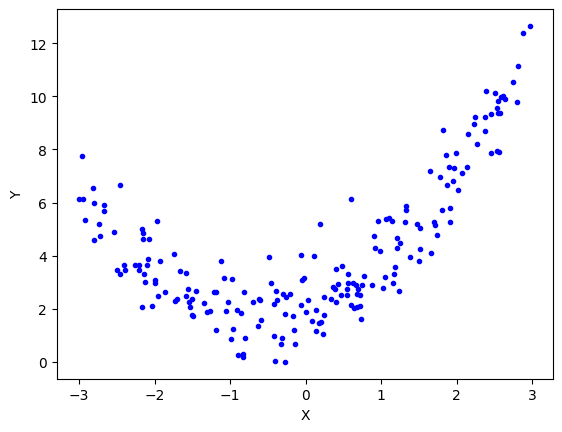

In [ ]:
# Visualize y(X)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Simple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.25717533446838203


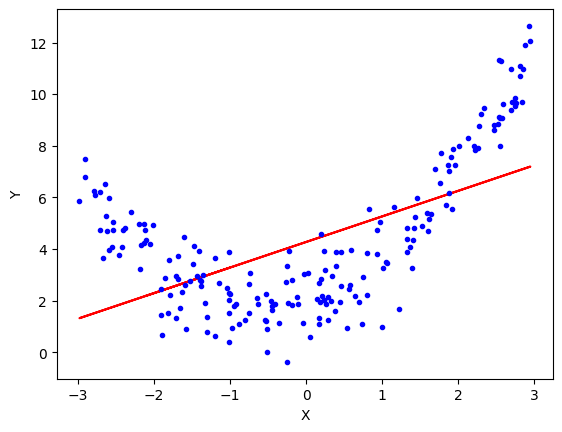

In [ ]:
# Visualize Linear regression
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# As Linear regression is not a fit, let's try Polynomial Regression

# Applying polynomial regression
# Degree chosen: 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply lienar regression to transformed X
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred = lr.predict(X_test_poly)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.8675441943599023


In [ ]:
lr.coef_

array([[0.        , 0.88139535, 0.80295669]])

In [ ]:
lr.intercept_

array([2.01238026])

$\hat{y} \approx 2.012 + 0.881X + 0.803X^2$

<ipython-input-27-8fe56a36101d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equation_plot_points.append(float(y))


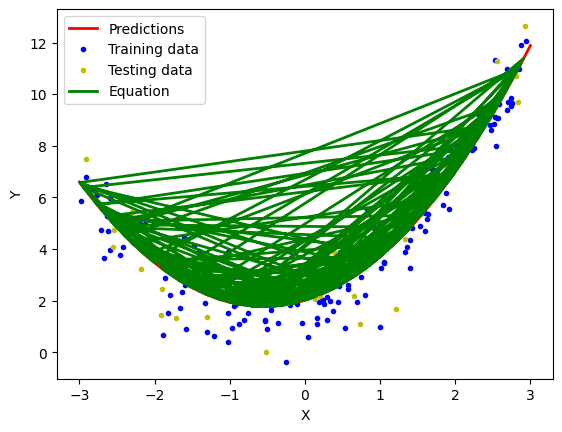

In [ ]:
# NOT OK
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Visualize polynomial regression
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# ------------------------------------------------------------
#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X:
  y = lr.intercept_[0] + (lr.coef_[0][1]*x_point) + (lr.coef_[0][2]*x_point**2)
  equation_plot_points.append(float(y))
# ------------------------------------------------------------

plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training data')
plt.plot(X_test, y_test, 'y.', label='Testing data')

plt.plot(X, equation_plot_points, 'g-', linewidth=2, label='Equation')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
# YES
X_list = []
for x in X:
  X_list.append(x[0])

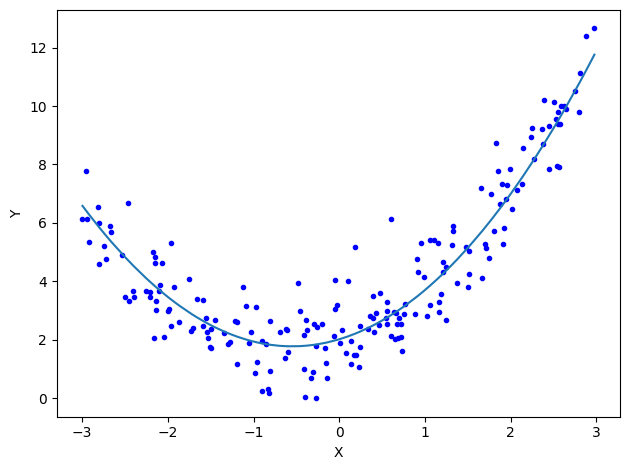

In [ ]:
plt.plot(X_list, y, 'b.')




#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X_list:
  yp = float(lr.intercept_[0]) + (float(lr.coef_[0][1])*x_point) + (float(lr.coef_[0][2])*x_point**2)
  equation_plot_points.append(float(yp))

equation_plot_points

#plt.plot(X, equation_plot_points, 'g.')
data = pd.DataFrame({'X': X_list, 'equation_plot_points': equation_plot_points})
sns.lineplot(x=X_list, y=equation_plot_points, data=data)




plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

# Univariate Polynomial Regression [Iteration 02]

In [ ]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [ ]:
# Separate target and feature
x = df[['variable01']]
y = df[['target']]

In [ ]:
model = sm.OLS(y, x).fit()
ypred = model.predict(x)

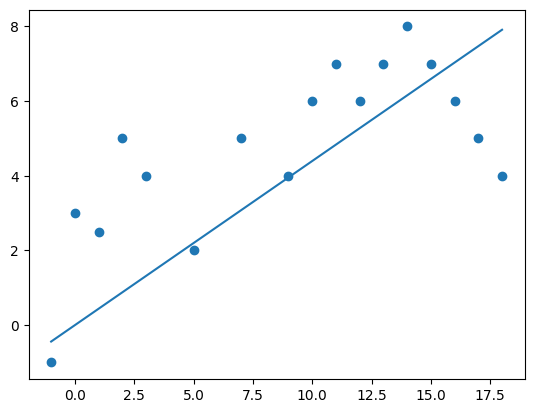

In [ ]:
plt.scatter(x, y)
plt.plot(x, ypred)

In [ ]:
pf2 = PolynomialFeatures(degree=2)
x2 = pf2.fit_transform(x)
x2.shape

(17, 3)

In [ ]:
x

,variable01
0,-1
1,0
2,1
3,2
4,3
5,5
6,7
7,9
8,10
9,11


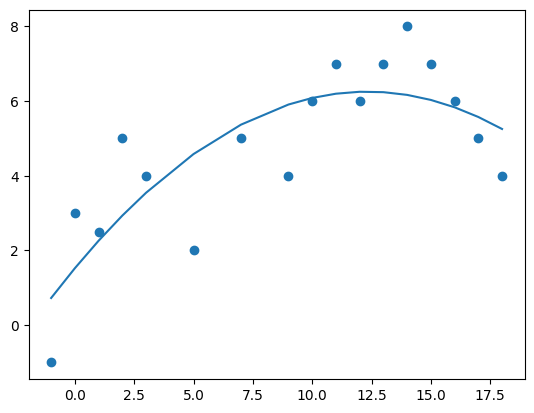

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

# Univariate Polynomial Regression [Iteration 03]

In [111]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [112]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [113]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [114]:
# Separate target and feature
X = df[['variable01']]
Y = df[['target']]

# Train / Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [115]:
X_train

,variable01
9,11
3,2
1,0
10,12
7,9
14,16
2,1
11,13
6,7
16,18


In [116]:
X_test

,variable01
12,14
4,3
5,5
0,-1


In [117]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [118]:
X_train_poly

array([[  1.,  11., 121.],
       [  1.,   2.,   4.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   9.,  81.],
       [  1.,  16., 256.],
       [  1.,   1.,   1.],
       [  1.,  13., 169.],
       [  1.,   7.,  49.],
       [  1.,  18., 324.],
       [  1.,  15., 225.],
       [  1.,  17., 289.],
       [  1.,  10., 100.]])

In [119]:
X_test_poly

array([[  1.,  14., 196.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,  -1.,   1.]])

In [120]:
# Feature Scaling required
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [122]:
X_train_scaled

array([[ 0.        ,  0.15814134, -0.13675415],
       [ 0.        , -1.38373673, -1.23150713],
       [ 0.        , -1.7263763 , -1.26893458],
       [ 0.        ,  0.32946113,  0.0784537 ],
       [ 0.        , -0.18449823, -0.51102867],
       [ 0.        ,  1.01474027,  1.12642236],
       [ 0.        , -1.55505651, -1.25957772],
       [ 0.        ,  0.50078091,  0.31237527],
       [ 0.        , -0.5271378 , -0.81044829],
       [ 0.        ,  1.35737984,  1.76268904],
       [ 0.        ,  0.84342048,  0.8363596 ],
       [ 0.        ,  1.18606005,  1.43519884],
       [ 0.        , -0.01317845, -0.33324828]])

In [123]:
X_test_scaled

array([[ 0.        ,  0.6721007 ,  0.56501058],
       [ 0.        , -1.21241694, -1.18472281],
       [ 0.        , -0.86977737, -1.035013  ],
       [ 0.        , -1.89769609, -1.25957772]])

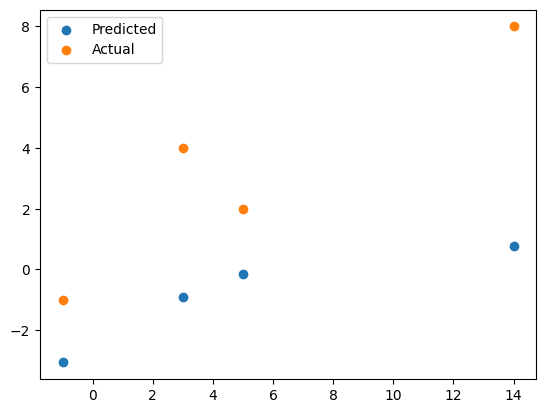

In [125]:
model3 = sm.OLS(Y_train, X_train_scaled).fit()
ypred = model3.predict(X_test_scaled)
#plt.scatter(X, Y)
plt.scatter(X_test, ypred, label='Predicted')
plt.scatter(X_test, Y_test, label='Actual')
plt.legend()

# Univariate Polynomial Regression [Iteration 04]

In [1]:
# CODE IMPLEMENTATION: Polynomial Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV # Regularization options
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [2]:
# --------------------------------------------------------------------------
# DATA PREPARATION

# Load the dataset and transform it to dataframe
x_raw = 6 * np.random.rand(200, 1) - 3
y_raw = (0.8 * x_raw**2) + (0.9 * x_raw) + 2 + np.random.randn(200,1)

# Load data into a DataFrame
df = pd.DataFrame(np.hstack((x_raw, y_raw)), columns=['Feature01', 'Target'])
df

,Feature01,Target
0,-2.074502,4.604438
1,-1.674525,2.525167
2,2.737908,10.438658
3,-2.034092,4.485696
4,1.669088,5.896517
...,...,...
195,0.579635,2.259024
196,-0.172088,2.071773
197,-0.223849,1.352749
198,-0.637520,2.540208


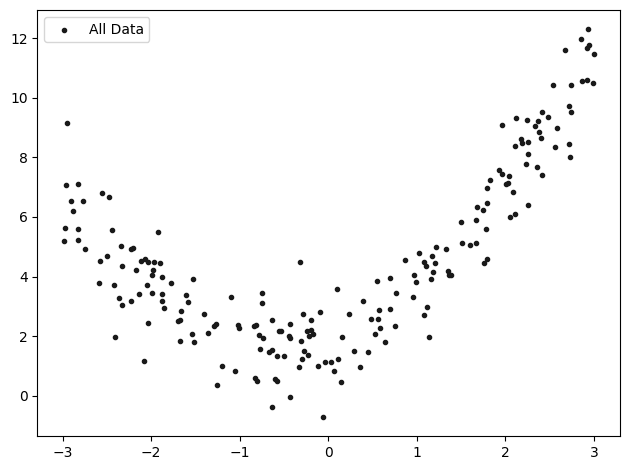

In [3]:
plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# --------------------------------------------------------------------------
# DATA SPLIT (X, y) & (Train, Test)

# Split the data into features (X) and target (y)
# Option 1: X = df[feature_names_list]
# Option 2:
X = df.drop(columns=["Target"])  # Replace "target" with the actual column name
y = df["Target"]

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

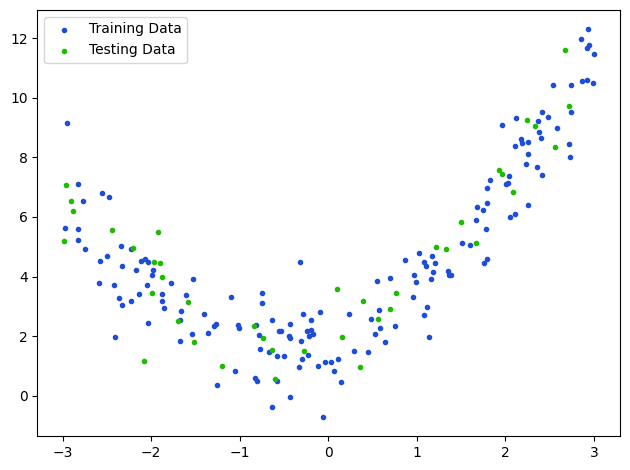

In [6]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [9]:
print("Original X:")
print(X_train[:5])
print("Polynomial X:")
print(X_train_poly[:5])
print("Scaled X:")
print(X_train_scaled[:5])

Original X:
     Feature01
79   -0.438406
197  -0.223849
38   -0.751657
24   -0.808071
122  -0.433909
Polynomial X:
[[ 1.         -0.43840571  0.19219957]
 [ 1.         -0.22384884  0.0501083 ]
 [ 1.         -0.75165747  0.56498895]
 [ 1.         -0.80807139  0.65297937]
 [ 1.         -0.43390895  0.18827698]]
Scaled X:
[[ 0.         -0.31227848 -1.05950609]
 [ 0.         -0.19007092 -1.11137815]
 [ 0.         -0.49070078 -0.923415  ]
 [ 0.         -0.52283308 -0.89129308]
 [ 0.         -0.30971721 -1.06093808]]


In [20]:
# --------------------------------------------------------------------------
# MODEL TRAINING AND PREDICTION

# Model creation and  training

model01 = LinearRegression()
model02 = LinearRegression()
model03 = LinearRegression()
model04 = ElasticNetCV(alphas=np.logspace(-6,6,100), l1_ratio=np.linspace(0.0, 1.0, 101), cv=5, random_state=36)
from sklearn.linear_model import ElasticNet
model05 = ElasticNet(alpha=1000.0, l1_ratio=0.5)

model01.fit(X_train, y_train)
model02.fit(X_train_poly, y_train)
model03.fit(X_train_scaled, y_train)
model04.fit(X_train_scaled, y_train)
model05.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred01 = model01.predict(X_test)
y_pred02 = model02.predict(X_test_poly)
y_pred03 = model03.predict(X_test_scaled)
y_pred04 = model04.predict(X_test_scaled)
y_pred05 = model04.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572.4120741542068, tolerance: 0.11448252825808657
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective di

In [24]:
# Predictions DataFrame
df_preds = pd.DataFrame({
    'y_test': y_test,
    'y_pred01': y_pred01,
    'y_pred02': y_pred02,
    'y_pred03': y_pred03,
    'y_pred04': y_pred04,
    'y_pred05': y_pred05,
})
df_preds

,y_test,y_pred01,y_pred02,y_pred03,y_pred04,y_pred05
95,1.007495,3.239077,2.057748,2.057748,2.079560,2.079560
15,3.988978,2.577910,3.199800,3.199800,3.210444,3.210444
30,4.937057,5.691598,4.452951,4.452951,4.454373,4.454373
158,3.133415,2.862886,2.614456,2.614456,2.630781,2.630781
128,7.081459,1.523999,6.589934,6.589934,6.568144,6.568144
115,2.510544,2.754441,2.820579,2.820579,2.834897,2.834897
69,6.823152,6.424343,7.195428,7.195428,7.171864,7.171864
170,0.970537,4.746903,2.293342,2.293342,2.314149,2.314149
174,1.494385,4.136046,1.722078,1.722078,1.747728,1.747728
45,3.578790,4.488267,1.972360,1.972360,1.995955,1.995955


In [21]:
model04.alpha_

np.float64(0.01)

In [22]:
model04.l1_ratio_

np.float64(0.0)

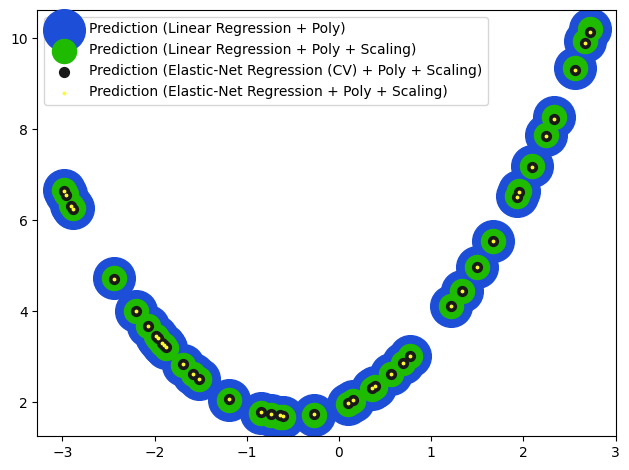

In [37]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
#plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
#plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00', s=100)
#plt.scatter(X_test, y_pred01, label="Prediction (Linear Regression)", color="#ff6930", s=3)
plt.scatter(X_test, y_pred02, label="Prediction (Linear Regression + Poly)", color="#1D4ED8", s=900)
plt.scatter(X_test, y_pred03, label="Prediction (Linear Regression + Poly + Scaling)", color="#1fbb00", s=300)
plt.scatter(X_test, y_pred04, label="Prediction (Elastic-Net Regression (CV) + Poly + Scaling)", color="#191919", s=50)
plt.scatter(X_test, y_pred05, label="Prediction (Elastic-Net Regression + Poly + Scaling)", color="#fff930", s=3)
plt.legend()
plt.tight_layout()
plt.show()

# Univariate Polynomial Regression [Iteration 05]

In [38]:
# CODE IMPLEMENTATION: Polynomial Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV # Regularization options
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [39]:
# --------------------------------------------------------------------------
# DATA PREPARATION

# Load the dataset and transform it to dataframe
x_raw = 6 * np.random.rand(200, 1) - 3
y_raw = (0.8 * x_raw**2) + (0.9 * x_raw) + 2 + np.random.randn(200,1)

# Load data into a DataFrame
df = pd.DataFrame(np.hstack((x_raw, y_raw)), columns=['Feature01', 'Target'])
df

,Feature01,Target
0,-1.273136,2.964596
1,-0.449191,3.324135
2,-0.086895,0.838141
3,-1.569538,3.166549
4,-0.348302,1.823154
...,...,...
195,0.169995,2.796822
196,0.252559,0.379807
197,0.089348,1.761872
198,0.872169,2.774139


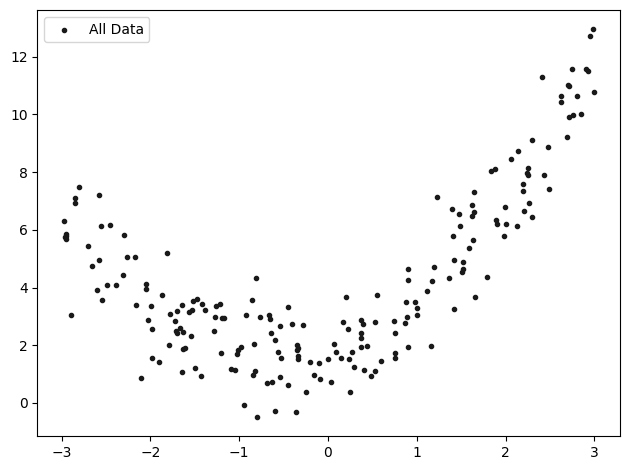

In [40]:
plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# --------------------------------------------------------------------------
# DATA SPLIT (X, y) & (Train, Test)

# Split the data into features (X) and target (y)
# Option 1: X = df[feature_names_list]
# Option 2:
X = df.drop(columns=["Target"])  # Replace "target" with the actual column name
y = df["Target"]

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

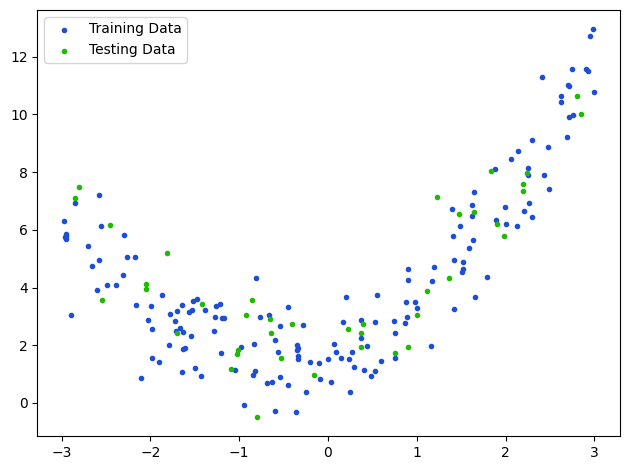

In [43]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=60)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [54]:
print("Original X:")
print(X_train[:5])
print("Polynomial X:")
print(X_train_poly[:5])
print("Scaled X:")
print(X_train_scaled[:5])

Original X:
     Feature01
79    2.686058
197   0.089348
38    0.754903
24    0.063077
122  -0.281390
Polynomial X:
[[ 1.00000000e+00  2.68605843e+00  7.21490987e+00  1.93796695e+01
   5.20549245e+01  1.39822569e+02  3.75571588e+02  1.00880723e+03
   2.70971516e+03  7.27845324e+03  1.95503507e+04  5.25133842e+04
   1.41054018e+05  3.78879334e+05  1.01769203e+06  2.73358025e+06
   7.34255626e+06  1.97225351e+07  5.29758816e+07  1.42296313e+08
   3.82216211e+08  1.02665508e+09  2.75765552e+09  7.40722384e+09
   1.98962360e+10  5.34424524e+10  1.43549550e+11  3.85582477e+11
   1.03569706e+12  2.78194282e+12  7.47246096e+12  2.00714667e+13
   5.39131324e+13  1.44813824e+14  3.88978391e+14  1.04481868e+15
   2.80644403e+15  7.53827264e+15  2.02482408e+16  5.43879577e+16
   1.46089232e+17  3.92404213e+17  1.05402064e+18  2.83116103e+18
   7.60466395e+18  2.04265717e+19  5.48669650e+19  1.47375874e+20
   3.95860207e+20  1.06330365e+21  2.85609572e+21  7.67163997e+21
   2.06064732e+22  5.53501

In [55]:
# --------------------------------------------------------------------------
# MODEL TRAINING AND PREDICTION

# Model creation and  training

model01 = LinearRegression()
model02 = LinearRegression()
model03 = LinearRegression()
model04 = ElasticNetCV(alphas=np.logspace(-6,6,100), l1_ratio=np.linspace(0.0, 1.0, 101), cv=5, random_state=36)
from sklearn.linear_model import ElasticNet
model05 = ElasticNet(alpha=1000.0, l1_ratio=0.5)

model01.fit(X_train, y_train)
model02.fit(X_train_poly, y_train)
model03.fit(X_train_scaled, y_train)
model04.fit(X_train_scaled, y_train)
model05.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred01 = model01.predict(X_test)
y_pred02 = model02.predict(X_test_poly)
y_pred03 = model03.predict(X_test_scaled)
y_pred04 = model04.predict(X_test_scaled)
y_pred05 = model04.predict(X_test_scaled)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.57304449624613, tolerance: 0.11586436839203908
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.50310562534011, tolerance: 0.11586436839203908
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.04678472374216, tolerance: 0.11586436839203908
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklear

In [56]:
# Predictions DataFrame
df_preds = pd.DataFrame({
    'y_test': y_test,
    'y_pred01': y_pred01,
    'y_pred02': y_pred02,
    'y_pred03': y_pred03,
    'y_pred04': y_pred04,
    'y_pred05': y_pred05,
})
df_preds

,y_test,y_pred01,y_pred02,y_pred03,y_pred04,y_pred05
95,4.345454,5.555654,3.098391,4.715184,4.434005,4.434005
15,6.187157,6.087199,3.101934,6.537944,6.339965,6.339965
30,5.774918,6.161475,3.113417,7.067671,6.648579,6.648579
158,0.982141,4.056852,3.098391,1.345399,1.773249,1.773249
128,2.727560,4.607090,3.098391,1.849358,2.302264,2.302264
115,4.111989,2.206392,3.127930,2.053679,3.466452,3.466452
69,7.105256,1.416306,6.489536,6.789749,5.668354,5.668354
170,8.033025,6.015684,3.099184,6.118396,6.052729,6.052729
174,1.930250,4.578484,3.098391,1.894929,2.262291,2.262291
45,6.606381,5.825588,3.098400,5.581888,5.336090,5.336090


In [57]:
model04.alpha_

np.float64(0.093260334688322)

In [58]:
model04.l1_ratio_

np.float64(1.0)

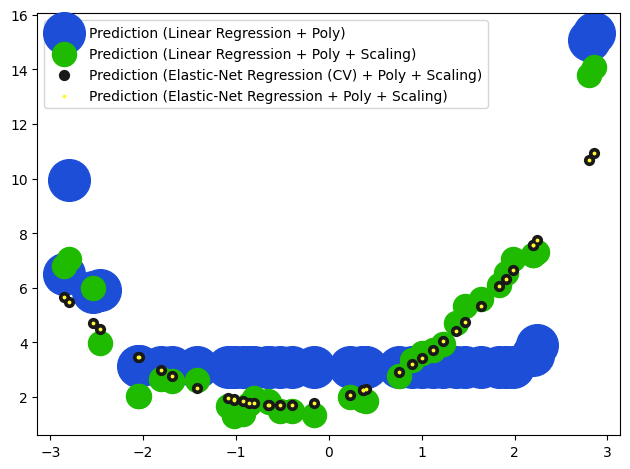

In [59]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
#plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
#plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00', s=100)
#plt.scatter(X_test, y_pred01, label="Prediction (Linear Regression)", color="#ff6930", s=3)
plt.scatter(X_test, y_pred02, label="Prediction (Linear Regression + Poly)", color="#1D4ED8", s=900)
plt.scatter(X_test, y_pred03, label="Prediction (Linear Regression + Poly + Scaling)", color="#1fbb00", s=300)
plt.scatter(X_test, y_pred04, label="Prediction (Elastic-Net Regression (CV) + Poly + Scaling)", color="#191919", s=50)
plt.scatter(X_test, y_pred05, label="Prediction (Elastic-Net Regression + Poly + Scaling)", color="#fff930", s=3)
plt.legend()
plt.tight_layout()
plt.show()

# Multivariate Polynomial Regression [Iteration 01]

In [1]:
# CODE IMPLEMENTATION: Polynomial Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV, ElasticNet, Ridge, Lasso # Regularization options
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization


In [2]:
# --------------------------------------------------------------------------
# DATA PREPARATION

# Load the dataset and transform it to dataframe
x_raw_1 = 6 * np.random.rand(200, 1) - 3
x_raw_2 = 10 * np.random.rand(200, 1) + 30
y_raw = (0.8 * x_raw_1**2) + (0.9 * x_raw_1) + 2 + np.random.randn(200,1) + (23 * x_raw_2**3) + (12 * x_raw_2**2) + 2 + np.random.randn(200,1)

# Load data into a DataFrame
df = pd.DataFrame(np.hstack((x_raw_1, x_raw_2, y_raw)), columns=['Feature01', 'Feature02', 'Target'])
df

,Feature01,Feature02,Target
0,2.032601,30.634153,6.724910e+05
1,2.234015,36.582730,1.142115e+06
2,-0.265229,39.663430,1.454037e+06
3,0.069195,36.954902,1.177156e+06
4,-0.021549,31.102942,7.036565e+05
...,...,...,...
195,-0.456112,38.938804,1.376122e+06
196,0.257755,38.087247,1.288182e+06
197,2.150119,31.664200,7.422275e+05
198,1.532274,39.451499,1.430957e+06


In [3]:
# --------------------------------------------------------------------------
# DATA SPLIT (X, y) & (Train, Test)

# Split the data into features (X) and target (y)
# Option 1: X = df[feature_names_list]
# Option 2:
X = df.drop(columns=["Target"])  # Replace "target" with the actual column name
y = df["Target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train

,Feature01,Feature02
79,-0.327345,32.548730
197,2.150119,31.664200
38,1.870608,35.306431
24,0.046615,31.492048
122,2.119342,30.610866
...,...,...
106,2.974245,39.737731
14,-2.408427,35.819858
92,2.401344,31.430468
179,-0.523600,38.586899


In [85]:
# --------------------------------------------------------------------------
degrees = np.arange(1, 21, 1)
bics = []
def degree_bic_calculator():
  global X_train
  global X_test
  global y_train
  global y_test
  global degrees
  global bics
  for degree in degrees:
    # Creation of Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    # Model Training
    model = ElasticNetCV(alphas=np.logspace(-6,6,100), l1_ratio=np.linspace(0.0, 1.0, 101), cv=6, random_state=36)
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate BIC (to select degree)
    mse = mean_squared_error(y_test, y_pred)
    n_samples = len(y_train)
    log_likelihood = -0.5 * n_samples * np.log(2 * np.pi * mse) - 0.5 * n_samples
    n_params = X_train_poly.shape[1]
    bic = -2 * log_likelihood + n_params * np.log(n_samples)
    bics.append(bic)

In [86]:
degree_bic_calculator()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+10, tolerance: 7.755e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.982e+10, tolerance: 7.755e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [87]:
degrees

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [88]:
bics

[np.float64(3623.9743416321417),
 np.float64(3252.2584449280434),
 np.float64(2548.5920685318315),
 np.float64(2212.9279934437964),
 np.float64(2539.379186758339),
 np.float64(2714.5211732751727),
 np.float64(2850.532171321801),
 np.float64(2961.2029064876256),
 np.float64(3070.9835953136517),
 np.float64(3170.332613377353),
 np.float64(3250.99717166943),
 np.float64(3313.2072890292247),
 np.float64(3362.4757998080995),
 np.float64(3402.8310919051073),
 np.float64(3438.184671189988),
 np.float64(3471.0303997228107),
 np.float64(3506.446820102911),
 np.float64(3547.4619332361913),
 np.float64(3598.924246380461),
 np.float64(3660.713661977549)]

In [89]:
for degree, bic in zip(degrees, bics):
  print(f"Degree: {degree:>4}, BIC: {bic:>12,.6f}")

Degree:    1, BIC: 3,623.974342
Degree:    2, BIC: 3,252.258445
Degree:    3, BIC: 2,548.592069
Degree:    4, BIC: 2,212.927993
Degree:    5, BIC: 2,539.379187
Degree:    6, BIC: 2,714.521173
Degree:    7, BIC: 2,850.532171
Degree:    8, BIC: 2,961.202906
Degree:    9, BIC: 3,070.983595
Degree:   10, BIC: 3,170.332613
Degree:   11, BIC: 3,250.997172
Degree:   12, BIC: 3,313.207289
Degree:   13, BIC: 3,362.475800
Degree:   14, BIC: 3,402.831092
Degree:   15, BIC: 3,438.184671
Degree:   16, BIC: 3,471.030400
Degree:   17, BIC: 3,506.446820
Degree:   18, BIC: 3,547.461933
Degree:   19, BIC: 3,598.924246
Degree:   20, BIC: 3,660.713662


Smallest BIC is for degree 4

In [4]:
# Polynomial Features degree 4
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [12]:
X_train_poly[:1]

array([[ 1.00000000e+00, -3.27344608e-01,  3.25487304e+01,
         1.07154492e-01, -1.06546514e+01,  1.05941985e+03,
        -3.50764452e-02,  3.48774268e+00, -3.46795376e+02,
         3.44827711e+04,  1.14820852e-02, -1.14169376e+00,
         1.13521596e+02, -1.12877492e+04,  1.12237042e+06]])

In [14]:
X_train_scaled[:1]

array([[ 0.        , -0.29390953, -0.77020089, -1.10101247, -0.27812966,
        -0.78477732, -0.08398753, -1.07921365, -0.26064639, -0.79619333,
        -0.7467971 , -0.08366159, -1.04439869, -0.24230722, -0.80448271]])

In [5]:
model = ElasticNetCV(alphas=np.logspace(-6,6,100), l1_ratio=np.linspace(0.0, 1.0, 101), cv=6, random_state=36)
model.fit(X_train_scaled, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3861356964.262865, tolerance: 884558290.3440143
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3046943384.2537055, tolerance: 884558290.3440143
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2342802779.2425323, tolerance: 884558290.3440143
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/li

ElasticNetCV(alphas=array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2.00923300e-04,
       2.65608778e-04, 3.511191...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]),
             random_state=36)

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [9]:
# Model parameters
print(model.intercept_)
print(model.coef_)

1008818.213889018
[ 0.00000000e+00  1.55665410e+03  1.54587640e+03  4.04251258e+02
 -2.30960779e+03  8.50483447e+04 -1.09979398e+03 -3.11177471e+02
  8.92591134e+02  8.47504697e+04 -7.33528408e+01  1.11210086e+03
 -1.12302769e+01 -1.50665323e+02  8.37952567e+04]
